In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# AED

from pandas_profiling import ProfileReport

# Preporcesamiento

from sklearn.model_selection import train_test_split

# Evaluación

from sklearn.metrics import (r2_score, roc_auc_score,
                            classification_report, confusion_matrix,
                            roc_curve, accuracy_score)

# ML

from sklearn.ensemble import GradientBoostingClassifier

%matplotlib inline

In [ ]:
!pip install scikit-plot
!pip install shap
!pip install eli5
!pip install --upgrade pandas_profiling

     |████████████████████████████████| 358kB 11.1MB/s 
  Created wheel for shap: filename=shap-0.38.1-cp37-cp37m-linux_x86_64.whl size=490504 sha256=067a601db3f8ad3b974fd54bb6efd1d43b0a7aa7f3e1d28a7afbf361d8f796a6
  Stored in directory: /root/.cache/pip/wheels/a8/fb/e4/88012be41842b9be62ae18d82d1b1e880daf8539d1fef1fa00
Successfully built shap
     |████████████████████████████████| 112kB 9.7MB/s 
     |████████████████████████████████| 245kB 11.8MB/s 
     |████████████████████████████████| 3.1MB 25.8MB/s 
     |████████████████████████████████| 81kB 7.1MB/s 
     |████████████████████████████████| 61kB 6.5MB/s 
     |████████████████████████████████| 81kB 7.6MB/s 
     |████████████████████████████████| 604kB 44.7MB/s 
     |████████████████████████████████| 296kB 46.1MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp37-none-any.whl size=27085 sha256=e855bf1008947b4bc602cd1440b478f4627552a67a5f8fb5bba43da48cd0a7b7
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null #installa version de java

In [ ]:
!wget -q https://www-us.apache.org/dist/spark/spark-3.0.2/spark-3.0.2-bin-hadoop2.7.tgz

In [ ]:
!tar xf spark-3.0.2-bin-hadoop2.7.tgz

In [ ]:
!pip install -q findspark

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.2-bin-hadoop2.7"

In [ ]:
import findspark
findspark.init()

In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
# Test the spark
df = spark.createDataFrame([{"hello": "world"} for x in range(1000)])
df.show(3, False)

/content/spark-3.0.2-bin-hadoop2.7/python/pyspark/sql/session.py:381: UserWarning: inferring schema from dict is deprecated,please use pyspark.sql.Row instead
  warnings.warn("inferring schema from dict is deprecated,"


+-----+
|hello|
+-----+
|world|
|world|
|world|
+-----+
only showing top 3 rows



Generar Reset de variables al hacer el Upgrade de PandasProfiling

In [7]:
# DataViz

import scikitplot as skplt
import seaborn as sns
plt.style.use('ggplot')

# Interpretación
import shap

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
dfr = pd.read_csv(
    'drive/MyDrive/2021Q1_DSF_contents/CLASS NOTEBOOKS/Interpretacion_modelos/wine_data/winequality-red.csv', sep=';')
dfr['wine_red'] = 1
dfw = pd.read_csv(
    'drive/MyDrive/2021Q1_DSF_contents/CLASS NOTEBOOKS/Interpretacion_modelos/wine_data/winequality-white.csv', sep=';')
dfw['wine_white'] = 1

df = pd.concat([dfr,dfw]).fillna(0)

In [10]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_red,wine_white
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1.0,0.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1.0,0.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1.0,0.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1.0,0.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1.0,0.0


# Contexto

Dataset de caracteristicas de vinos blanco y rojos con una calificacion.

Citation Request:
  This dataset is public available for research. The details are described in [Cortez et al., 2009]. 
  Please include this citation if you plan to use this database:

  P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
  Modeling wine preferences by data mining from physicochemical properties.
  In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.

  Available at: [@Elsevier] http://dx.doi.org/10.1016/j.dss.2009.05.016
                [Pre-press (pdf)] http://www3.dsi.uminho.pt/pcortez/winequality09.pdf
                [bib] http://www3.dsi.uminho.pt/pcortez/dss09.bib

1. Title: Wine Quality 

3. Past Usage:

  P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
  Modeling wine preferences by data mining from physicochemical properties.
  In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.

  In the above reference, two datasets were created, using red and white wine samples.
  The inputs include objective tests (e.g. PH values) and the output is based on sensory data
  (median of at least 3 evaluations made by wine experts). Each expert graded the wine quality 
  between 0 (very bad) and 10 (very excellent). Several data mining methods were applied to model
  these datasets under a regression approach. The support vector machine model achieved the
  best results. Several metrics were computed: MAD, confusion matrix for a fixed error tolerance (T),
  etc. Also, we plot the relative importances of the input variables (as measured by a sensitivity
  analysis procedure).
 
4. Relevant Information:

   These datasets can be viewed as classification or regression tasks.
   The classes are ordered and not balanced (e.g. there are munch more normal wines than
   excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent
   or poor wines. Also, we are not sure if all input variables are relevant. So
   it could be interesting to test feature selection methods. 

7. Attribute information:

   For more information, read [Cortez et al., 2009].

       Input variables (based on physicochemical tests):
       1 - fixed acidity
       2 - volatile acidity
       3 - citric acid
       4 - residual sugar
       5 - chlorides
       6 - free sulfur dioxide
       7 - total sulfur dioxide
       8 - density
       9 - pH
       10 - sulphates
       11 - alcohol
       Output variable (based on sensory data): 
       12 - quality (score between 0 and 10)


Se busca predecir que vinos seran buenos para automatizar el proceso de seleccion y saber que los identifican

In [11]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_red,wine_white
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1.0,0.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1.0,0.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1.0,0.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1.0,0.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0.0,1.0
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0.0,1.0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0.0,1.0
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0.0,1.0


# Generacion de variable objetivo

In [12]:
df['good_wine'] = df.quality.ge(7).astype(int)

In [13]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_red,wine_white,good_wine
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1.0,0.0,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1.0,0.0,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1.0,0.0,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1.0,0.0,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0.0,1.0,0
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0.0,1.0,0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0.0,1.0,0
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0.0,1.0,1


# Realicen un Analisis Exploratorio descriptivo de los datos

In [14]:
profile = ProfileReport(df)
profile

Output hidden; open in https://colab.research.google.com to view.

EDA:

Que encontraron en el Analisis Exploratorio Descriptivo?

In [ ]:
df_s = spark.create.DataFrame(df)

In [15]:
import random

In [35]:
random.choice([1,2,5,6,7,8])

8

In [16]:
df = df_s.toPandas()

In [ ]:
df = pd.get_dummies(data=df,columns=['cat1','cat2'])

# Entrenamiento del modelo

In [36]:
x_cols = [col for col in df.columns if col not in ['quality','good_wine','novayan']]
y = 'good_wine'

In [37]:
x_cols

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'wine_red',
 'wine_white']

In [38]:
x_train, x_test, y_train,y_test = train_test_split(
    df[x_cols], df[y], test_size=0.2, random_state=69)

In [39]:
gbm = GradientBoostingClassifier()
gbm.fit(x_train, y_train)

y_hat_tree = gbm.predict(x_test)
y_hat_tree_proba = gbm.predict_proba(x_test)

In [40]:
print(classification_report(y_test, y_hat_tree))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1041
           1       0.70      0.38      0.49       259

    accuracy                           0.84      1300
   macro avg       0.78      0.67      0.70      1300
weighted avg       0.83      0.84      0.82      1300



Pintemos la matriz de confusion... si no se puede con el codigo que les di haganlo a mano (sklearn y matplotlib)

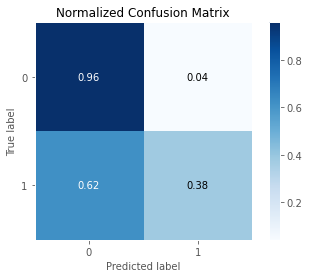

In [41]:
skplt.metrics.plot_confusion_matrix(y_test, y_hat_tree,normalize=True)

# Que le pasa al modelo, mejoralo

Apliquemos un UnderSample

4179 1018
Random under-sampling:
1    1018
0    1018
Name: good_wine, dtype: int64


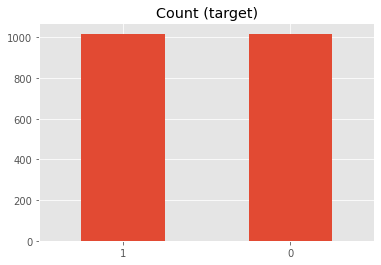

In [42]:
df_train = pd.concat([x_train,y_train], 1)
count_class_0, count_class_1 = df_train.good_wine.value_counts()
print(count_class_0, count_class_1)
# Divide by class

df_class_0 = df_train[df_train['good_wine'] == 0]
df_class_1 = df_train[df_train['good_wine'] == 1]

df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.good_wine.value_counts())

df_test_under.good_wine.value_counts().plot(kind='bar', title='Count (target)',rot=0);

In [43]:
gbm2 = GradientBoostingClassifier()
gbm2.fit(df_test_under[x_cols], df_test_under[y])

y_hat_tree = gbm2.predict(x_test)
y_hat_tree_proba = gbm2.predict_proba(x_test)

In [44]:
print(classification_report(y_test, y_hat_tree))

              precision    recall  f1-score   support

           0       0.94      0.75      0.83      1041
           1       0.45      0.82      0.58       259

    accuracy                           0.76      1300
   macro avg       0.70      0.78      0.71      1300
weighted avg       0.84      0.76      0.78      1300



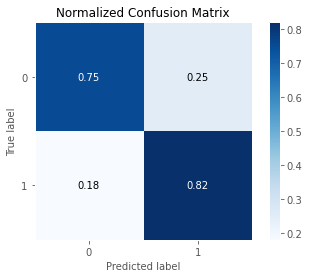

In [45]:
skplt.metrics.plot_confusion_matrix(y_test, y_hat_tree,normalize=True)

# Interpretacion del modelo

Dataframe de variables mas importantes:

In [48]:
f_imp = pd.DataFrame(gbm2.feature_importances_,
                     index=x_cols, columns=['imp'])
f_imp

,imp
fixed acidity,0.037595
volatile acidity,0.167521
citric acid,0.041310
residual sugar,0.054307
chlorides,0.038762
free sulfur dioxide,0.047753
total sulfur dioxide,0.048388
density,0.044674
pH,0.054150
sulphates,0.052211


## Cálculo de importancia relativa, 

En el caso de los Gradient Boosting Machines (GBM), la importancia de variables se obtiene contando el numero de veces que los arboles seleccionaron a esa variable para partir los datos y ponderado por la impureza de Gini.

In [49]:
f_imp['imp_rel'] = (f_imp/f_imp.max()*100)

Gráfico de importancia de variables:

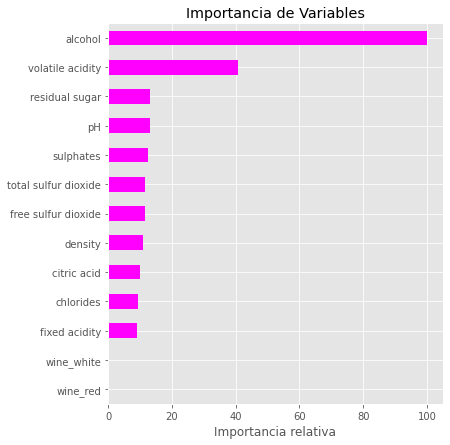

In [50]:
f_imp.sort_values('imp_rel',ascending=True).imp_rel.plot.barh(figsize=(6,7),
                                                              title='Importancia de Variables',color='magenta')
plt.xlabel('Importancia relativa');

# Método de Calculo de la Importancia por permutación

Para calcular la importancia de variables por esté método, tenemos que tener un modelo previamente ajustado (fit). 

El método consiste en fijar las variables $x_1,x_2,...,x_{n-1}$ y la variable $x_n$ reordenaremos sus valores aleatoreamente. 

Ese reordenameinto deberia de causar que el poder predictivo del modelo bajara, ya que los datos reordenados no corresponden a algo observado en el mundo real. Los modelos se veran seriamente afectados, si la columna que modificamos es importante, causando terribles predicciones y asi dandole un peso a la variable por importancia dependiendo que tanto se afecta su poder predictivo.

Por ejemplo, tomemos algunas variables de nuestro modelo y repliquemos lo que hara el calculo.

[Fuente](https://www.kaggle.com/dansbecker/permutation-importance)

In [51]:
df_imp = df_test_under[x_cols].copy().reset_index()
df_imp[['pH', 'sulphates', 'alcohol']].head()

,pH,sulphates,alcohol
0,2.91,0.78,11.4
1,2.98,0.82,11.5
2,3.27,0.78,10.9
3,3.30,0.64,10.4
4,3.11,0.52,9.5


In [52]:
df_imp['alcohol'] = df_imp.alcohol.sample(frac=1, random_state=8).reset_index(drop=True)

In [53]:
df_imp[['pH', 'sulphates', 'alcohol']].head() # ya no corresponden las alcohol

,pH,sulphates,alcohol
0,2.91,0.78,9.2
1,2.98,0.82,9.1
2,3.27,0.78,9.9
3,3.30,0.64,10.8
4,3.11,0.52,9.6


In [54]:
# pre accuracy del modelo original
accuracy_score(gbm2.predict(df_test_under[x_cols]), df_test_under[y])

0.8492141453831041

In [55]:
# accuracy con la columna shuffleada
accuracy_score(gbm2.predict(df_imp[x_cols]), df_test_under[y])

0.6640471512770137

Claramente observamos como se afecto, iteraremos sobre cada columna fijando las demas y reordenando una para dar con el peso de todas. Para ello existe la biblioteca __eli5__ que nos ayudara a esta permutacion.

In [56]:
import eli5
from eli5.sklearn import PermutationImportance

The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.


In [57]:
perm = PermutationImportance(gbm2, random_state=8).fit(df_test_under[x_cols],df_test_under[y])
eli5.show_weights(perm, feature_names = x_cols)
# Por default en modelos de clasificacion evalua sobre accuracy

Weight,Feature
0.1827 ± 0.0163,alcohol
0.0631 ± 0.0066,volatile acidity
0.0325 ± 0.0053,free sulfur dioxide
0.0275 ± 0.0071,sulphates
0.0273 ± 0.0039,total sulfur dioxide
0.0253 ± 0.0012,residual sugar
0.0240 ± 0.0106,pH
0.0176 ± 0.0056,chlorides
0.0166 ± 0.0079,citric acid
0.0150 ± 0.0041,density


# Conclusiones del metodo de permutacion

- La variable de alcohol afecta considerablemente y es de las mas importantes para saber si es un buen vino o no.
- No importa si es un vino blanco o rojo, para predecir si es un buen vino
- Cuales otras se te ocurren?

## Efectos Marginales

Son una manera de calcular el efecto que cada variable tiene en promedio en nuestro conjunto de __entrenamiento__. 

Semejante al calculo anterior fijaremos las columnas $x_1,x_2,...,x_{n-1}$ supliendo sus valores por su valor promedio y la variable $x_n$ la reemplazamos por sus deciles, Suponiendo que, si el valor del registro 1 de $x_n$ es 7 y cae en el 2do decil con valor 8, se reemplaza el valor por el 2do decil, si el valor del registro 4 de $x_n$ es 27 y cae en el 9no decil con valor 30, se reemplaza el valor por el 9no decil... y asi con todos los valores de la columna $x_n$

Predecimos con nuestro modelo (previamente ajustado) y graficamos. En el eje $x$ son los deciles de la variable $x_n$ y el eje $y$ es $\hat{y}$ la probabilidad que predijo el valor.

Asi podremos observar el efecto de la variable a nivel global.

Si te interesa revisar mayor detalle pulsa [aquí](https://christophm.github.io/interpretable-ml-book/pdp.html). 

Tambien recomiendo el libro [[1]](https://web.stanford.edu/~hastie/Papers/ESLII.pdf)T. Hastie, R. Tibshirani and J. Friedman, “Elements of Statistical Learning Ed. 2”, Springer, 2009.

## Efectos marginales con sklearn

In [58]:
from sklearn.inspection import plot_partial_dependence

In [59]:
f_imp_sort = f_imp.sort_values('imp_rel', ascending=False)
names = list(f_imp_sort.head(10).index)
feat = []
lista_casv = x_cols

for i in f_imp_sort.head(10).index:
    if i in lista_casv:
        feat.append(lista_casv.index(i))

The fig parameter is deprecated in version 0.22 and will be removed in version 0.24


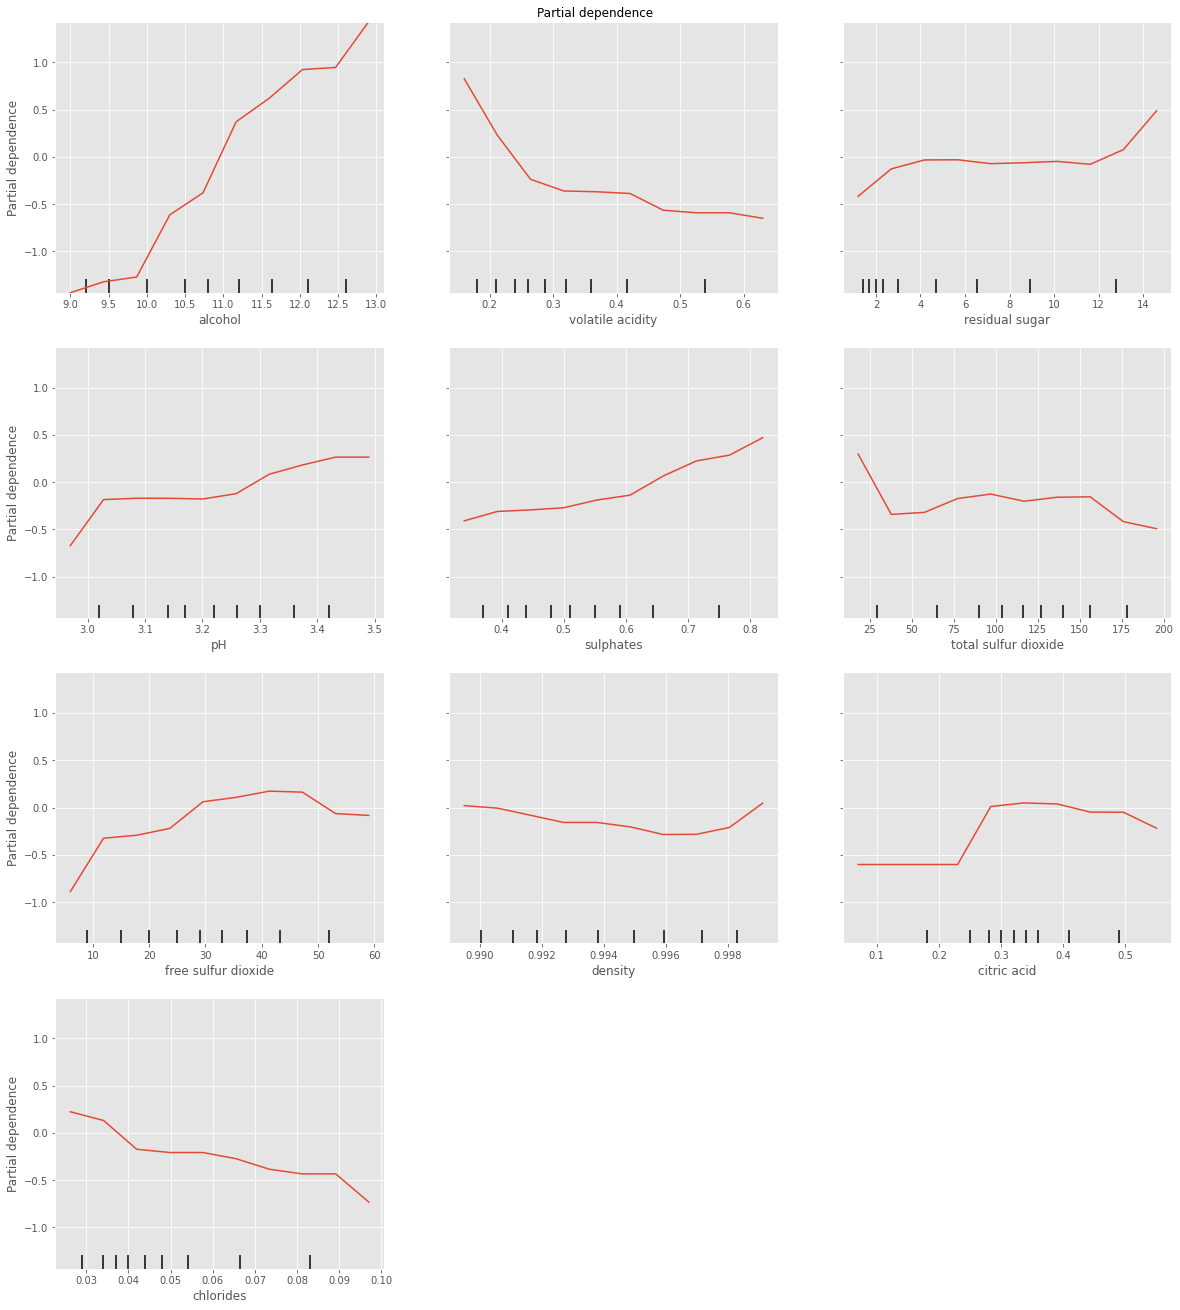

In [60]:
fig = plt.figure()

plot_partial_dependence(gbm2, df_test_under[x_cols], feat, feature_names=x_cols, fig=fig,
                        grid_resolution=10, response_method='decision_function')

fig.suptitle('Partial dependence')
plt.subplots_adjust(top=0.97)  # tight_layout causes overlap with suptitle
fig.set_size_inches(20, 20.5);

## Shap Values (Shapley Additive Explanations)

Es una aproximación de la teoría de juegos para explicar del output de cualquier modelo de *ML*. [Articulo](https://arxiv.org/pdf/1705.07874.pdf)

La idea central es basandonos en los [Shapley values](https://es.wikipedia.org/wiki/Valor_de_Shapley) de la teoria de juegos y adaptandolo a ML nacen los SHAP values, donde estos valores miden la contribución de cada una de las variables con sus combinaciones y observan como afectan a la prediccion a nivel local (por registro).


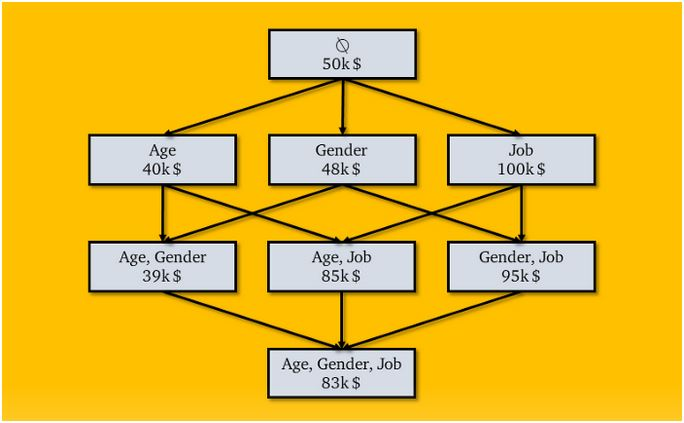


Los SHAP values nos ayudan a interpretar a nivel global, como por cuales valores de cada una de las variables se ve mayor afectado la prediccion y es facil la comparacion entre ellas.

Para una explicación más amplia presiona [acá](https://github.com/slundberg/shap#citations) o [aquí](https://towardsdatascience.com/explain-your-model-with-the-shap-values-bc36aac4de3d) y [aquí](https://towardsdatascience.com/shap-explained-the-way-i-wish-someone-explained-it-to-me-ab81cc69ef30).

Cabe mencionar que se el numero de modelos que generara seran $2^F$ con $F$ el numero de variables, sin embargo, en la paqueteria de SHAP generan algunas aproximaciones y muestreos para no hacer toooooodo los modelos y que sea eficiente.

# Shap Values Explicacion detallada

La idea central es basandonos en los Shapley values de la teoria de juegos y adaptandolo a ML nacen los SHAP values, donde estos valores miden la contribución de cada una de las variables con sus combinaciones y observan como afectan a la prediccion a nivel local (por registro).

Los Shapley values estan basados en describir la salida de cada posible combinacion o alianza de jugadores que se consideraran para obtener la importancia de un solo jugador.

En el siguiente diagrama veremos 8 modelos con diversas variables que prediciendo en el mismo registro, cada nodo representa un modelo con ciertas variable y con su prediccion asociada.

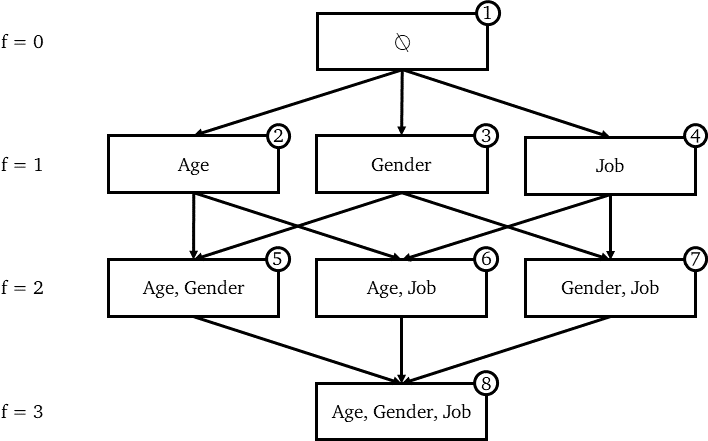

Donde $f$ es el número de variables que esta tomando el modelo.

Los SHAP values requieres entrenar distintos modelos predictivos para cada combinación de variables, estos modelos son comparables por que utilizan el mismo conjunto de entrenamiento e hiperparametros. Lo unico en lo que se diferencian es en la seleccion de variables.

En este otro diagrama los enlaces representan la contribucion marginal por la variable agregada. La contribucion marginal es la diferencia entre las predicciones de 2 nodos conectados por efecto de la variable adicional.

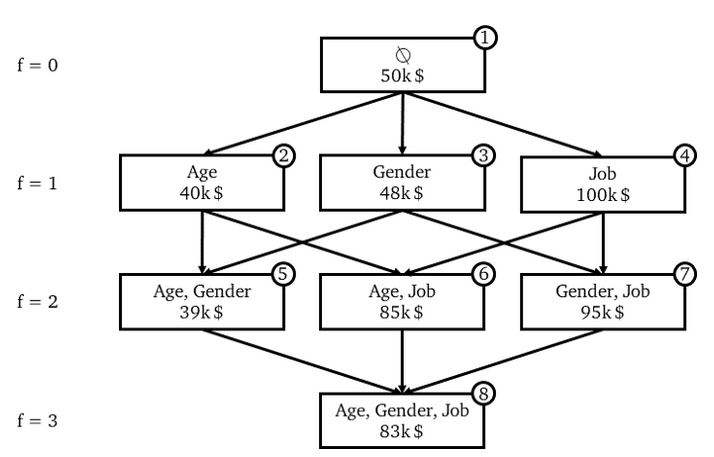


Por ejemplo, veamos la contribucion marginal de la variable age y de aquello que contenga age. La formula seria:

$MC_{{age}(age)}(x_0) = Predict_{age}(x_0) - Predict_{\emptyset}(x_0) =  \$40k-\$50k = \$-10k $

Para obtener el efecto general de Age es necesario tomar todas las contribuciones marginales en todos los modelos donde la edad esta presente. Como lo marcamos en la siguiente figura:

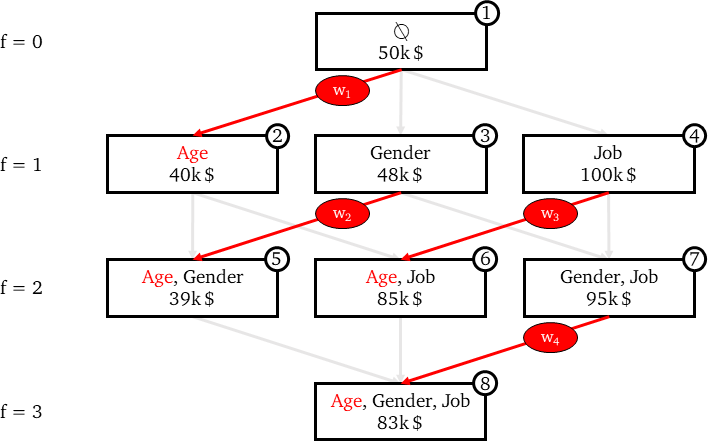

Todos los enlaces marcados con un cierto peso que es la contribucion marginal seran los que generan el SHAP value de la siguiente mandera:

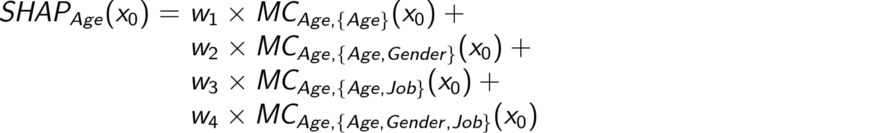


Donde $\sum{w_i}=1$

Ahora para determinar el peso de la contribucion, es decir, de los enlaces. 

Se determina a partir de $\frac{1}{num}$
Con $num$ igual al numero de enlaces por nivel

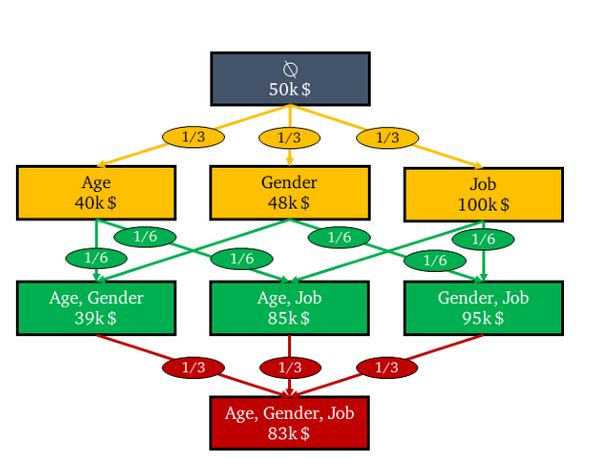


Como observamos en el primer nivel amarillo de combinacion de variables hay 3 enlaces, en el segundo 6 y en el tercero 3.

Para ensamblar el peso de los enlaces con la contribucion marginal, Se utiliza el binomio de Newton,:

$$f x \binom{F}{f}$$

De manera que podemos obtener la combinacion de pesos y contribuciones con la siguiente formula en el caso de la edad
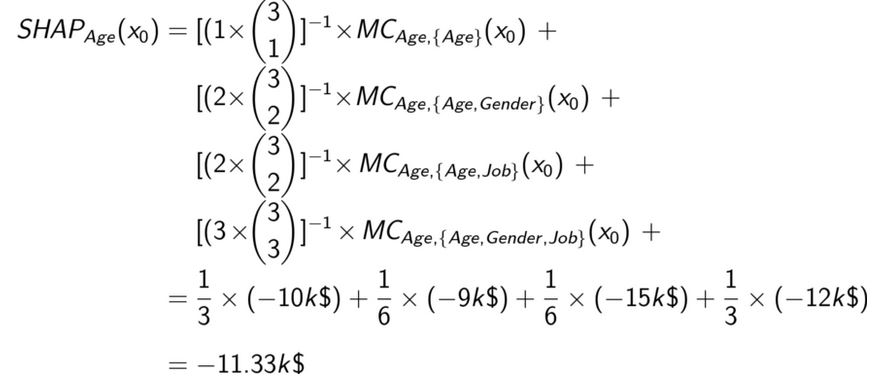


Y a nivel general seria:
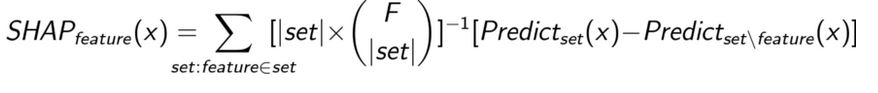



La caracteristica principal de los SHAP values es que la suma de los valores SHAP de cada variable de una observación dada, produce la diferencia entre la predicción del modelo y el modelo nulo. Esta es en realidad la razón de su nombre: Explicaciones de SHapley Additive.

[aquí](https://towardsdatascience.com/shap-explained-the-way-i-wish-someone-explained-it-to-me-ab81cc69ef30).

En el siguiente diagrama mostramos el valor absoluto medio de los valores SHAP para cada variable obteniendo un gráfico de barras estándar (produce barras apiladas para salidas de varias clases):

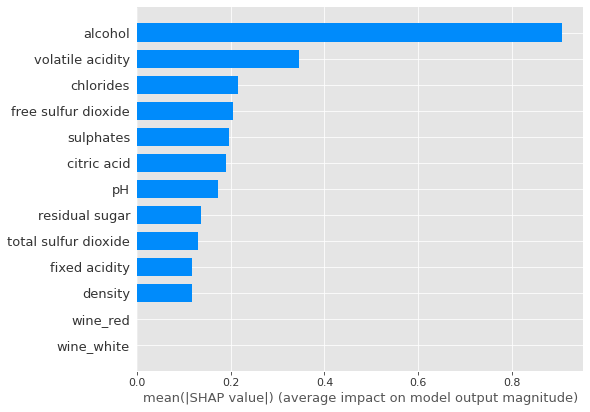

In [61]:
shap_values = shap.TreeExplainer(gbm2, feature_perturbation="tree_path_dependent").shap_values(df_test_under[x_cols])
shap.summary_plot(shap_values, df_test_under[x_cols], plot_type="bar")

En el siguiente grafico mostramos la importancia a nivel global, donde cada punto representa un registro con su respectivo valor por variable

Observaremos 3 caracteristicas.

+ El eje Vertical nos muestra el nombre de la variable
+ El color nos muestra si el valor de esa variable era alto o bajo para cada registro
+ El eje Horizontal nos muestra el efecto de esos valores pos variable si obtuvo una mayor o menor prediccion (caso clasificacion - es 1, caso regresion - valor que modifico la prediccion)

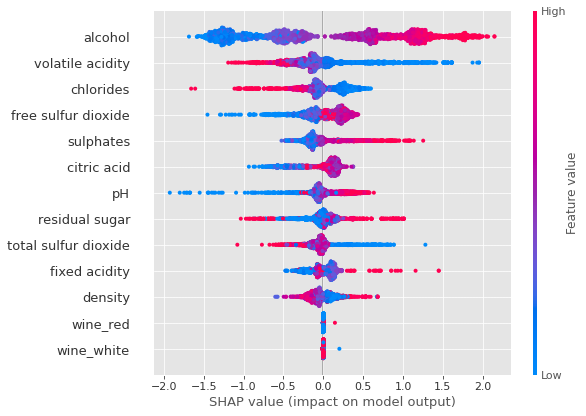

In [62]:
f = plt.figure()
shap.summary_plot(shap_values, df_test_under[x_cols])

Las variables aparecen ordenadas de mayor a menor impacto. En el eje x se mide el impacto en la predicción ya sea negativo o positivo y la barra de color corresponde al valor de la variable.

In [63]:
# Generamos un cachito de data aleatoria
X_output = df_test_under[x_cols].copy()
X_output.loc[:,'predict'] = np.round(gbm2.predict(X_output),2)

# y seleccionamos algunos aleatoreamente.

S = X_output.sample(10)
S

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,wine_red,wine_white,predict
74,6.7,0.23,0.31,2.10,0.046,30.0,96.0,0.99260,3.33,0.64,10.7,0.0,1.0,1
3163,7.1,0.36,0.37,4.80,0.019,39.0,114.0,0.99036,3.08,0.49,12.7,0.0,1.0,1
1204,7.2,0.36,0.46,2.10,0.074,24.0,44.0,0.99534,3.40,0.85,11.0,1.0,0.0,1
2960,7.7,0.11,0.34,14.05,0.040,41.0,114.0,0.99634,3.07,0.59,11.0,0.0,1.0,1
1368,7.3,0.22,0.41,15.40,0.050,55.0,191.0,1.00000,3.32,0.59,8.9,0.0,1.0,0
1730,9.2,0.23,0.30,1.10,0.031,40.0,99.0,0.99290,2.94,0.30,10.4,0.0,1.0,0
2097,6.7,0.24,0.33,12.30,0.046,31.0,145.0,0.99830,3.36,0.40,9.5,0.0,1.0,0
3004,6.3,0.18,0.36,1.20,0.034,26.0,111.0,0.99074,3.16,0.51,11.0,0.0,1.0,1
1673,6.6,0.27,0.31,5.30,0.137,35.0,163.0,0.99510,3.20,0.38,9.3,0.0,1.0,0
4298,5.6,0.26,0.00,10.20,0.038,13.0,111.0,0.99315,3.44,0.46,12.4,0.0,1.0,0


Otro uso de los SHAP values es que se interpretan midiendo el impacto que una variable cuando tenga un cierto valor y se compara la prediccion si la variable hubiese tomado un valor base (el resultado promedio del modelo sobre el conjunto de datos de entrenamiento que pasamos).

Podemos ver el efecto decada una de las variables como contribuye para un registro de manera que se cumple:

sum(SHAP values para todas las variables) = pred_para_registro_n - pred_para_valores_base



In [64]:
# Initialize your Jupyter notebook with initjs(), otherwise you will get an error message.
shap.initjs()

# Write in a function
def shap_plot(j):
    explainerModel = shap.TreeExplainer(gbm2, feature_perturbation="tree_path_dependent")
    shap_values_Model = explainerModel.shap_values(S)
    p = shap.force_plot(explainerModel.expected_value, shap_values_Model[j], S.iloc[[j]])
    return(p)

Version LIME pero en shap values, predicción a nivel local. Interpretación por registro.

In [66]:
shap.initjs()
shap_plot(1)

In [69]:
shap.initjs()
shap_plot(8)

Las barras rojas indican el valor de cierta variable que aporto a que sea un buen vino y la barra azul aporta los valores de las variables que NO seran buenos vinos

# Ejercicio

- Mejoren el modelo inicial:
- Ya sea agregando variables o haciendo un tratamiento estadistico (estandarizacion, normalizacion)
- Aplicando otro algoritmo
- Apliquen un Grid Search
- Interpreten su modelo y extrae los insights